In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns


In [25]:
data = pd.read_csv("C:/Users/kimbj/OneDrive/바탕 화면/김범진/가천 2학년 1학기/인공지능프로그래밍/baseball_players.csv", index_col = 0)

In [26]:
data

,Team,Position,Height(inches),Weight(pounds),Age
Name,,,,,
Adam_Donachie,BAL,Catcher,74,180.0,22.99
Paul_Bako,BAL,Catcher,74,215.0,34.69
Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...
Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19


In [27]:
df_data=pd.DataFrame(data,columns=data.columns)

In [28]:
df_data

,Team,Position,Height(inches),Weight(pounds),Age
Name,,,,,
Adam_Donachie,BAL,Catcher,74,180.0,22.99
Paul_Bako,BAL,Catcher,74,215.0,34.69
Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...
Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19


In [29]:
df_data.isnull().sum()

Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [30]:
df_data=df_data.dropna(axis=0)

In [31]:
df_data.isnull().sum()

Team              0
Position          0
Height(inches)    0
Weight(pounds)    0
Age               0
dtype: int64

Text(0.5, 1.0, 'Postion Count')

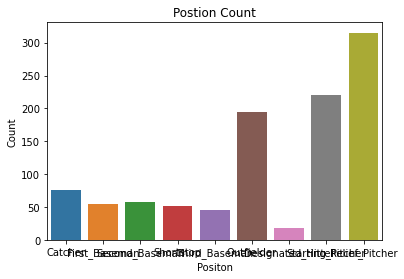

In [32]:
sns.countplot(data=df_data,x="Position")
plt.xlabel("Positon")
plt.ylabel("Count")
plt.title("Postion Count") 

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_data['Position']=le.fit_transform(df_data['Position'])
df_data.head()

C:\Users\kimbj\AppData\Local\Temp/ipykernel_10968/471242859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Position']=le.fit_transform(df_data['Position'])


,Team,Position,Height(inches),Weight(pounds),Age
Name,,,,,
Adam_Donachie,BAL,0,74,180.0,22.99
Paul_Bako,BAL,0,74,215.0,34.69
Ramon_Hernandez,BAL,0,72,210.0,30.78
Kevin_Millar,BAL,2,72,210.0,35.43
Chris_Gomez,BAL,2,73,188.0,35.71


In [34]:
le=LabelEncoder()
df_data['Team']=le.fit_transform(df_data['Team'])
df_data.head()

C:\Users\kimbj\AppData\Local\Temp/ipykernel_10968/2411684341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Team']=le.fit_transform(df_data['Team'])


,Team,Position,Height(inches),Weight(pounds),Age
Name,,,,,
Adam_Donachie,3,0,74,180.0,22.99
Paul_Bako,3,0,74,215.0,34.69
Ramon_Hernandez,3,0,72,210.0,30.78
Kevin_Millar,3,2,72,210.0,35.43
Chris_Gomez,3,2,73,188.0,35.71


Text(0.5, 1.0, 'Records per position')

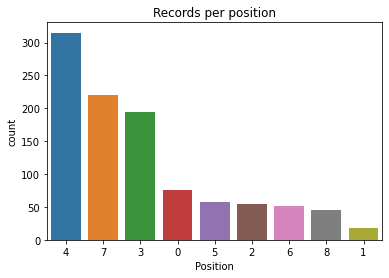

In [35]:

sns.countplot(x="Position",data=df_data,
              order=df_data.Position.value_counts().index)
plt.title("Records per position")

In [36]:
df_target=df_data['Position']

In [37]:
df_data= df_data.drop(['Position', 'Team'], axis=1)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,test_size=0.25,random_state=0)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [40]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.29343629343629346
[[ 0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0]]


In [41]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.28957528957528955
[[ 0  0  0  2 20  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0 17  1  0  0  0]
 [ 0  0  0  3 37  0  0  0  0]
 [ 0  0  1  3 72  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0]
 [ 0  0  0  2 12  0  0  0  0]
 [ 0  0  0  2 49  1  2  0  0]
 [ 0  0  0  0 16  0  0  0  0]]


C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.2972972972972973
[[ 0  0  0  7 15  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  3 12  0  0  3  0]
 [ 0  0  0 11 27  0  0  2  0]
 [ 0  0  0 12 53  0  0 11  0]
 [ 0  0  0  5 13  0  0  0  0]
 [ 0  0  0  3 10  0  0  1  0]
 [ 0  0  0  7 34  0  0 13  0]
 [ 0  0  0  4 12  0  0  0  0]]


In [43]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.24324324324324326
[[ 2  0  1  8  5  0  0  2  4]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  7  3  1  2  5  0]
 [ 4  0  0  7 10  4  1 11  3]
 [ 0  1  2 14 34  3  2 19  1]
 [ 0  0  1  6  3  3  1  2  2]
 [ 0  0  0  2  6  1  2  2  1]
 [ 3  1  0  5 23  2  1 15  4]
 [ 2  0  0  7  1  2  2  2  0]]


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.23552123552123552
[[ 1  0  3  6  7  1  0  1  3]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  2  6  2  1  0  7  0]
 [ 0  0  0 10 12  3  1 10  4]
 [ 3  0  3 10 31  5  1 22  1]
 [ 0  0  0  6  4  4  0  3  1]
 [ 0  0  0  1  6  1  2  3  1]
 [ 1  0  0  8 31  2  0 10  2]
 [ 0  0  0  6  3  0  2  4  1]]


In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.150871033290617
